## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [1]:
import math, random

#function to generate random numbers according to linear law
def t_normal(k1, k2, k3, k4):
    k1 = random.uniform(0, k1) 
    k2 = random.uniform(0,k2)
    k3 = random.uniform(0,k3)
    k4 = random.uniform(0,k4)

    '''
    k1 = (k1-0)*random.random() + 0
    k2 = (k2-0)*random.random() + 0
    k3 = (k3-0)*random.random() + 0
    k4 = (k4-0)*random.random() + 0
    '''

    return k1+k2+k3+k4

# Function to calculate mean for normal distribution
def mean_theory(k1, k2, k3, k4):
    math_exp = 0.5*(k1 + k2+ k3+ k4)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(k1, k2, k3, k4):
    variance_value = (1/12)*((k1**2) + (k2**2) + (k3**2) + (k4**2))
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [2]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [3]:
def simulations(k1, k2, k3, k4, random_numbers):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(k1, k2, k3, k4)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_numbers)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_numbers)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(k1, k2, k3, k4)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_numbers, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [4]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random numbers: {random_numbers}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random is {max(random_numbers)}")
    print(f"Min_Random is {min(random_numbers)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [10]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory, std_dev_sample, mean_sample):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(12, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_values = [normal_dis_function(std_dev_sample, mean_sample, x) for x in x_values]
  
    plt.plot(x_values, y_values, color='blue', label="Sample PDF")

    x_value = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_value = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    plt.plot(x_value, y_value, color='red', label="Normal PDF")

    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [6]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random numbers: [6.0857195879601385, 8.638571501390732, 5.344813637240314, 5.43194957367832, 5.209024289076086, 3.1554979382360195, 2.934394010273415, 7.453478276409733, 10.153439263201022, 6.233390760788469]
Max_Random is 10.153439263201022
Min_Random is 2.934394010273415

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 6.064027883825425

Theoretical Variance: 5.25
Unbiased Sample Variance: 5.02369609696059

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 2.2413603228755052

Relative Error for Mathematical Expectation: 6.707263325762697%
Relative Error for Standard Deviation: 2.179015816688907%
Relative Error for Variance: 4.310550534084001%



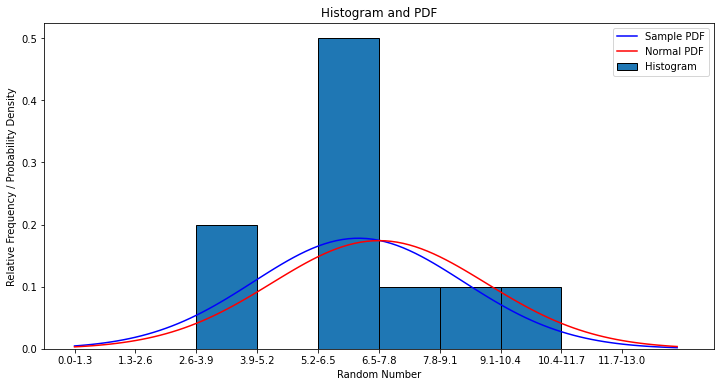

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random numbers: [9.737660161465783, 8.976474450232764, 3.8474224422369185, 3.653412408885326, 5.939023282232213, 6.091534210009693, 1.9634688648530214, 4.507882114074547, 7.35495670540411, 7.8200019125490075, 2.6013502365238415, 10.28354189829906, 7.782658844388337, 4.569675970002253, 3.41013154770361, 5.526149000288044, 9.903816418053502, 6.721664823111077, 3.2022334822845706, 5.813465044537819]
Max_Random is 10.28354189829906
Min_Random is 1.9634688648530214

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 5.985326190856774

Theoretical Variance: 5.25
Unbiased Sample Variance: 6.438092161582909

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 2.537339583418607

Relative Error for Mathematical Expectation

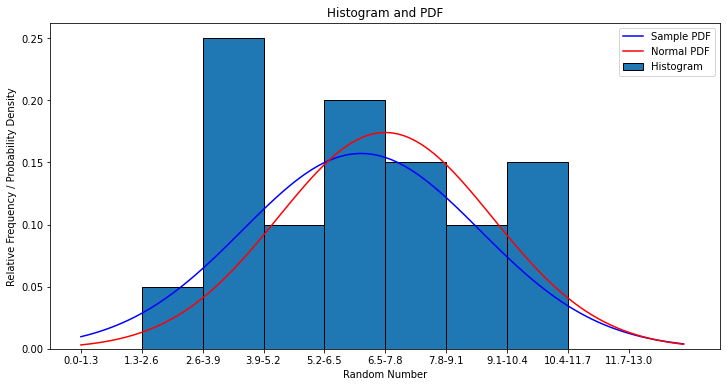

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random numbers: [5.46391934526339, 6.084932461781626, 5.18504970230874, 9.103871850324456, 7.903057485690884, 9.86620092564621, 10.29372211928093, 9.748049740246268, 4.614199315178877, 2.9405000926049447, 6.767362354885835, 5.974678453746808, 6.951681283095797, 3.299743437921567, 10.274820461529561, 6.126858943159441, 6.62702184582794, 7.819285207388086, 6.353410527762882, 6.741291315371273, 1.7803158209185344, 8.868387268705275, 7.26906934841557, 8.445012788908048, 6.985138741150161, 5.40224595688635, 9.54917313324051, 5.849705264653462, 5.69721068116901, 5.886535164135809, 5.9079004511714075, 7.506731260336478, 7.81634590219193, 4.896179041903227, 6.9767836706787065, 5.48159965727849, 5.079875095429261, 6.854486466668423, 6.009910639429318, 8.308046848181927, 2.

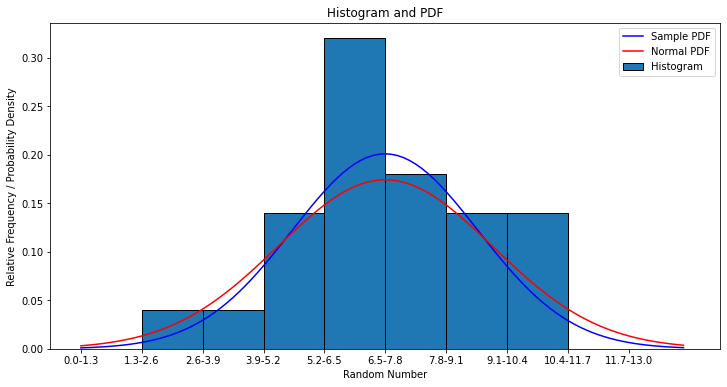

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random numbers: [6.744614485883403, 7.556383235220734, 9.089970599515897, 5.169807570712594, 4.458597292716088, 9.924439892939512, 3.796867879461691, 5.825013077390275, 3.772570451735212, 5.9714086038332415, 9.437498908982318, 9.126722223754413, 8.754555805117059, 6.462637268295483, 7.856598913923602, 4.359487056377436, 3.3703464275291504, 3.1720197619113266, 9.376651679067681, 8.323586232377188, 8.119031368773216, 4.164890550670852, 8.8872201823115, 8.035869951594702, 5.1313729762180555, 2.9022158321526916, 11.311620748774281, 3.022777197973107, 3.717891732679723, 4.355511818891739, 5.322551089414306, 2.821120338064552, 4.949671058557772, 7.574179674618156, 8.273208529136213, 6.877924466689345, 2.6638295153097395, 8.26853233213294, 4.593786269093192, 9.628353424

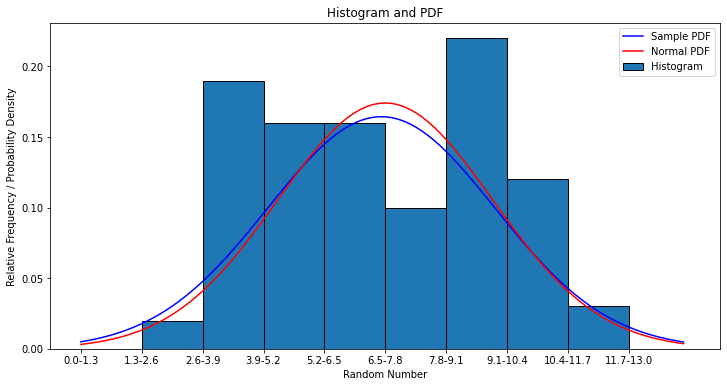

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random numbers: [9.35896325645119, 6.048943734069979, 7.353679194092584, 5.049929106553032, 9.726613569933784, 11.259005389558, 5.899215422947361, 8.571290273699997, 8.912228473332426, 7.028045883246595, 2.516375707397453, 9.052583668957384, 7.517400078466854, 4.504040259905367, 9.612284331290862, 5.844333004204895, 2.672204992642921, 9.465593173742086, 8.35288019120634, 9.698725236860183, 3.1387572201244804, 3.1995175145839636, 9.967045578195588, 7.167999346217173, 9.574008177325457, 6.271992563605492, 6.152927592029878, 2.889843420247719, 9.10914278274005, 2.3269730350425957, 7.565460898193386, 3.5430566841912547, 7.7742494869197305, 9.533895610830958, 9.24017003224861, 3.431491536310797, 7.183808259409852, 11.214458030098331, 4.123195227159789, 5.0408199963250

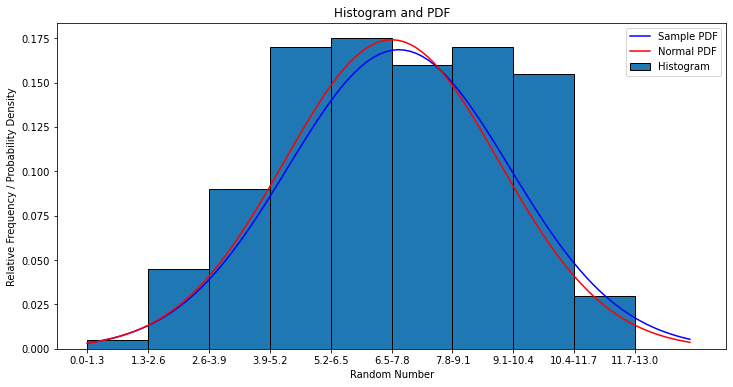

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random numbers: [8.234861988823642, 8.55000504176212, 7.808167825562817, 8.94199846665823, 3.691345371853369, 1.026466143912455, 2.647032115301367, 8.641272848384743, 5.4348875359152515, 7.91260858165686, 6.229809570034646, 5.531625627340738, 6.05000623328932, 7.235271294507836, 10.602987246335896, 3.876500774939318, 7.831011092650878, 8.133153575034303, 8.577880421971225, 8.041427422428844, 11.361213088802216, 3.466178820140095, 4.0916030060328055, 0.9002510213508852, 7.829846317593162, 6.524419551143532, 4.263913592554475, 8.60851870756118, 6.335532705591347, 5.47326205598415, 0.4150051093206675, 2.8957411775305486, 9.586175034437886, 4.057509829388368, 3.882855511898098, 10.637347716073773, 8.994869637930105, 3.423001535834077, 4.753115079949741, 2.66589388760

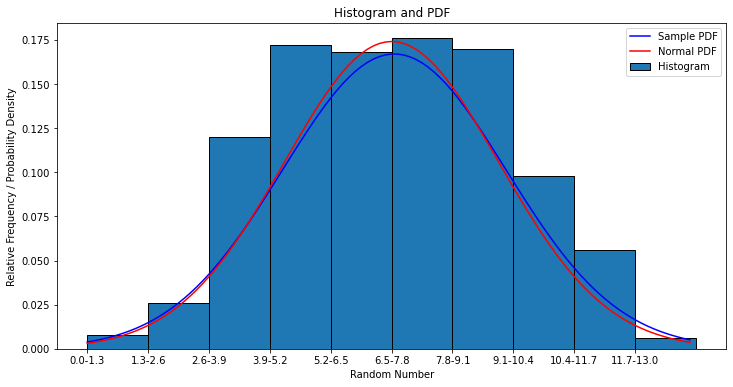

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random numbers: [8.854269540477414, 6.37759734524377, 4.765787931168031, 9.86453613170746, 3.9862169859104997, 7.098811700978689, 6.819096340681548, 9.15581549470004, 9.150764308680584, 8.788094790720134, 6.258257246198813, 5.651885039788422, 7.258443210452251, 8.859736063744396, 3.180315510518624, 3.861525622137356, 8.502913616700049, 7.523184867186086, 4.689655753697673, 9.687743254250625, 10.97193221159188, 2.2984765605588624, 3.0734015090031823, 8.073529341447472, 8.198411157912822, 5.1239350430490775, 10.213948015219882, 3.5662775852237116, 2.1852911203817666, 9.07549489181687, 7.3073943379567865, 7.707027971634684, 10.263227084057867, 4.78022432790049, 4.71863083686841, 4.8902640696923205, 6.267676385343855, 7.42532898429503, 8.216901522335407, 10.71494851

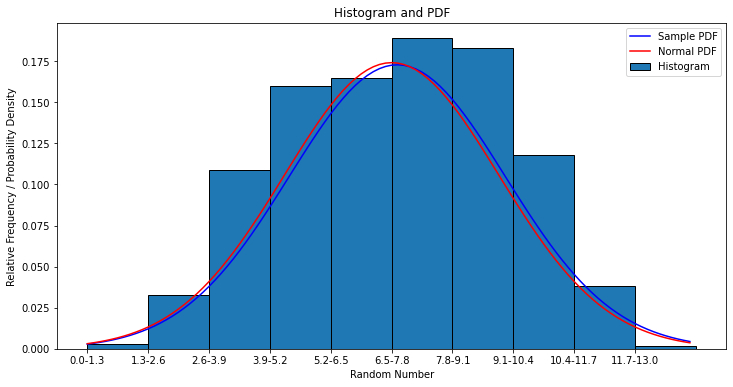

In [11]:
k1 = 2
k2 = 1
k3 = 7
k4 = 3

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_numbers = []

    for _ in range(n):
        # Generate random numbers 
        random_number = t_normal(k1, k2, k3, k4)
        random_numbers.append(random_number)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(k1, k2, k3, k4, random_numbers)

    aggregate()

    left_boundary = 0  # Minimum boundary of the range
    right_boundary = 13  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_numbers, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
    

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)
    

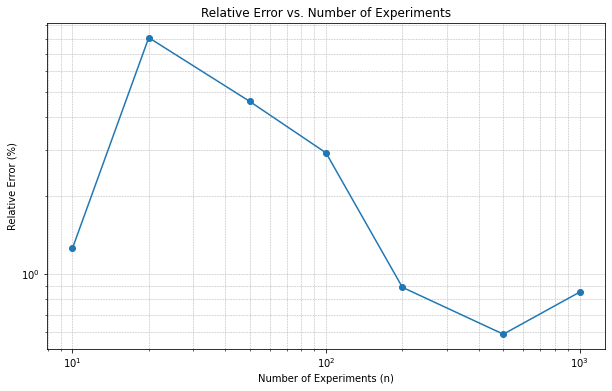

In [113]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

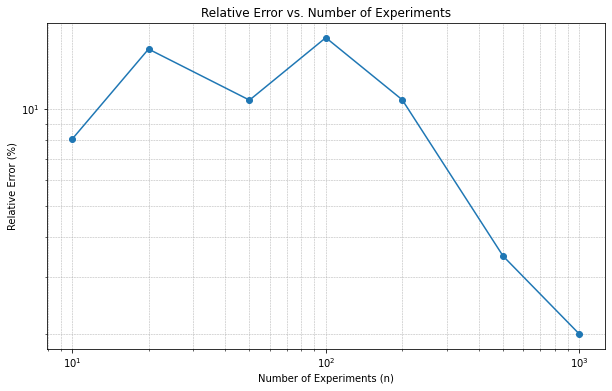

In [114]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

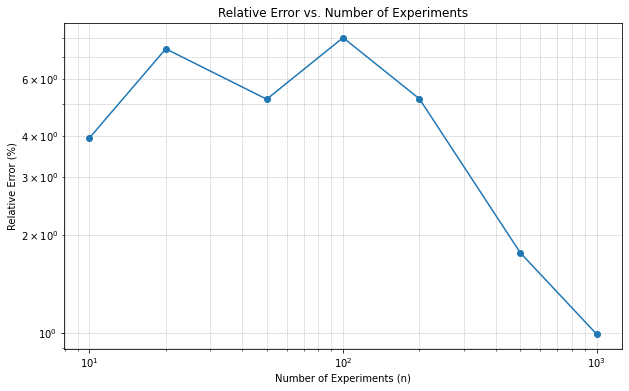

In [115]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [129]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
